<a href="https://colab.research.google.com/github/AngusYeh/data-science/blob/main/world_cup_2022_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# rank 、Score、offense ranking

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/世界盃 紀錄90s~2022/international_matches.csv',date_parser='date',parse_dates=True)

In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [ ]:
df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [ ]:
df_rank = df[['date','home_team','away_team','home_team_fifa_rank','away_team_fifa_rank']]
home = df_rank[['date','home_team','home_team_fifa_rank']].rename(columns={'home_team':'team','home_team_fifa_rank':'rank'})
away = df_rank[['date','away_team','away_team_fifa_rank']].rename(columns={'away_team':'team','away_team_fifa_rank':'rank'})

In [ ]:
rank = pd.concat([home,away])

In [ ]:
rank = rank.sort_values(by=(['team','date']),ascending=[True,False])

In [ ]:
rank['row_number'] = rank.groupby('team').cumcount()
rank_top = rank[rank['row_number']==0].drop('row_number',axis=1).nsmallest(10, 'rank')

In [ ]:
rank_top

,date,team,rank
23760,2022-06-06,Brazil,1
23909,2022-06-14,Belgium,2
23885,2022-06-13,France,3
23741,2022-06-05,Argentina,4
23906,2022-06-14,England,5
23907,2022-06-14,Italy,6
23866,2022-06-12,Spain,7
23867,2022-06-12,Portugal,8
23903,2022-06-14,Mexico,9
23908,2022-06-14,Netherlands,10


In [ ]:
rank_top_10 = rank_top.groupby('team').head(1).sort_values('rank')[:10]
rank_top_10[['team','rank']].reset_index()

,index,team,rank
0,23760,Brazil,1
1,23909,Belgium,2
2,23885,France,3
3,23741,Argentina,4
4,23906,England,5
5,23907,Italy,6
6,23866,Spain,7
7,23867,Portugal,8
8,23903,Mexico,9
9,23908,Netherlands,10


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


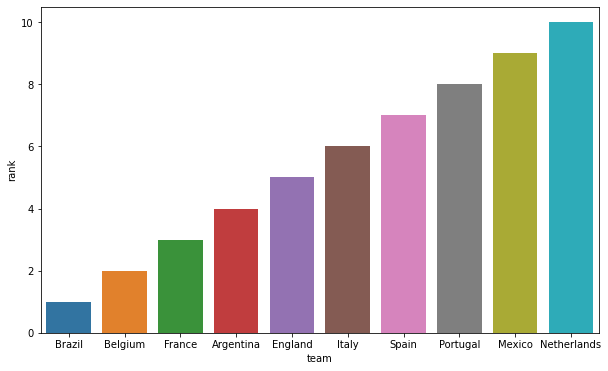

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.barplot(rank_top_10['team'],rank_top_10['rank'])

In [ ]:
def home_percentage(team):
    score = len(df[(df['home_team'] == team) & (df['home_team_result'] == "Win")]) / len(df[df['home_team'] == team]) * 100
    return round(score)
def away_percentage(team):
    score = len(df[(df['away_team'] == team) & (df['home_team_result'] == "Lose")]) / len(df[df['away_team'] == team]) * 100
    return round(score)

In [ ]:
def win_rate(team):
  j = []
  for i in team:
    j.append(home_percentage(i))
  return np.array(j)

In [ ]:
rank_top_10['home_win_rate'] = win_rate(rank_top_10['team'])

In [ ]:
rank_top_10['away_win_rate'] = win_rate(rank_top_10['team'])

In [ ]:
rank_top_10['total_win_rate'] = ((rank_top_10['home_win_rate']+rank_top_10['away_win_rate'])/2)

In [ ]:
win_rate_top_10 = rank_top_10.sort_values('total_win_rate',ascending=False)

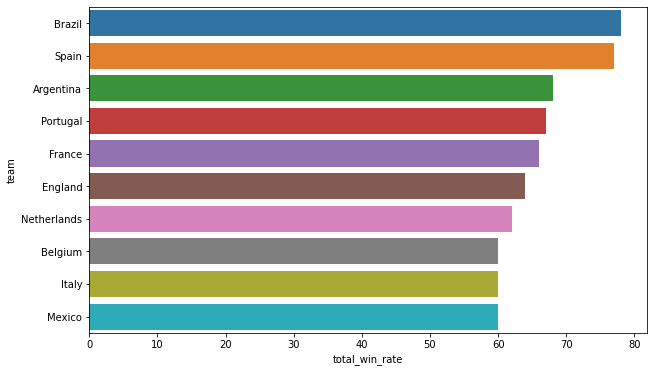

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
bar = sns.barplot(y='team',x='total_win_rate',data=win_rate_top_10)
#ax.bar_label(bar.containers[0])

In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [ ]:
offense = df[['date','home_team','away_team','home_team_mean_offense_score','away_team_mean_offense_score']]
home = offense[['date','home_team','home_team_mean_offense_score']].rename(columns={'home_team':'team','home_team_mean_offense_score':'mean_offense_score'})
away = offense[['date','away_team','away_team_mean_offense_score']].rename(columns={'away_team':'team','away_team_mean_offense_score':'mean_offense_score'})

In [ ]:
offense = pd.concat([home,away])
offense

In [ ]:
offense[offense['team'] == 'Brazil'].sort_values('mean_offense_score')

In [ ]:
offense = offense.sort_values(['date','team'],ascending=[False,True])
offense

,date,team,mean_offense_score
23897,2022-06-14,Afghanistan,NaN
23916,2022-06-14,Andorra,NaN
23910,2022-06-14,Armenia,69.7
23899,2022-06-14,Bahrain,NaN
23900,2022-06-14,Bangladesh,NaN
...,...,...,...
5,1993-08-08,Peru,NaN
3,1993-08-08,Sierra Leone,NaN
0,1993-08-08,Uruguay,NaN
2,1993-08-08,Venezuela,NaN


In [ ]:
offense.groupby('team').first().sort_values('mean_offense_score',ascending=False).reset_index()[:15]

,team,date,mean_offense_score
0,Argentina,2022-06-05,89.0
1,France,2022-06-13,88.3
2,England,2022-06-14,88.0
3,Brazil,2022-06-06,86.3
4,Portugal,2022-06-12,86.0
5,Belgium,2022-06-14,85.7
6,Italy,2022-06-14,85.3
7,Spain,2022-06-12,85.0
8,Poland,2022-06-14,84.7
9,Uruguay,2022-06-11,84.3


In [ ]:
defense = df[['date','home_team','away_team','home_team_mean_defense_score','away_team_mean_defense_score']]
home = defense[['date','home_team','home_team_mean_defense_score']].rename(columns={'home_team':'team','home_team_mean_defense_score':'mean_defense_score'})
away = defense[['date','away_team','away_team_mean_defense_score']].rename(columns={'away_team':'team','away_team_mean_defense_score':'mean_defense_score'})

In [ ]:
defense = pd.concat([home,away])

In [ ]:
defense = defense.sort_values(['date','team'],ascending=[False,True])
defense

In [ ]:
defense.groupby('team').first().sort_values('mean_defense_score',ascending=False).reset_index()[:15]

,team,date,mean_defense_score
0,Spain,2022-06-12,86.5
1,Portugal,2022-06-12,85.2
2,Netherlands,2022-06-14,85.2
3,England,2022-06-14,85.0
4,Brazil,2022-06-06,84.8
5,Italy,2022-06-14,84.2
6,France,2022-06-13,84.2
7,Germany,2022-06-14,84.0
8,Argentina,2022-06-05,82.2
9,Uruguay,2022-06-11,81.2


In [ ]:
score = df[['date','home_team','away_team','home_team_score','away_team_score']]
home = score[['date','home_team','home_team_score']].rename(columns={'home_team':'team','home_team_score':'score'})
away = score[['date','away_team','away_team_score']].rename(columns={'away_team':'team','away_team_score':'score'})

In [ ]:
score = pd.concat([home,away])

In [ ]:
score = score.sort_values(['date','team'],ascending=[False,True])
score.team.value_counts()

Mexico                      517
Saudi Arabia                471
USA                         464
Korea Republic              436
Brazil                      433
                           ... 
Samoa                        36
Montserrat                   36
Cook Islands                 31
American Samoa               31
Turks and Caicos Islands     26
Name: team, Length: 211, dtype: int64

In [ ]:
count_team = score.groupby('team').team.count()
count_team

team
Afghanistan       101
Albania           245
Algeria           296
American Samoa     31
Andorra           189
                 ... 
Vietnam           207
Wales             239
Yemen             188
Zambia            423
Zimbabwe          314
Name: team, Length: 211, dtype: int64

In [ ]:
total_score = score.groupby('team').score.sum()
total_score

team
Afghanistan       117
Albania           254
Algeria           446
American Samoa     22
Andorra            60
                 ... 
Vietnam           342
Wales             273
Yemen             174
Zambia            532
Zimbabwe          406
Name: score, Length: 211, dtype: int64

In [ ]:
mean_score = pd.concat([count_team,total_score],axis=1)
mean_score

,team,score
team,,
Afghanistan,101,117
Albania,245,254
Algeria,296,446
American Samoa,31,22
Andorra,189,60
...,...,...
Vietnam,207,342
Wales,239,273
Yemen,188,174


In [ ]:
mean_score = mean_score.rename(columns={'team':'times'})

In [ ]:
mean_score['mean_score'] = round(mean_score['score']/mean_score['times'],2)

In [ ]:
top_15 = mean_score.sort_values('mean_score',ascending=False).reset_index()[:15]

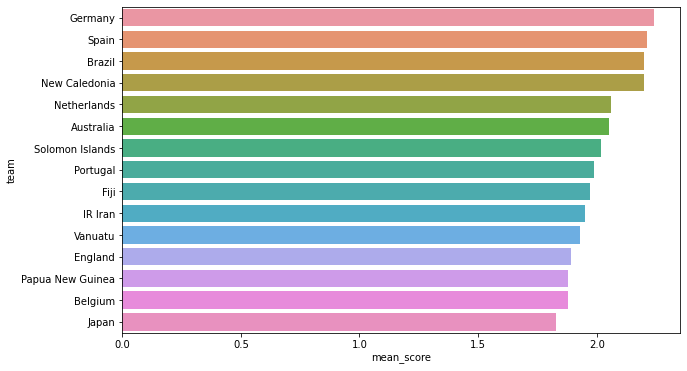

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
bar = sns.barplot(y='team',x='mean_score',data=top_15)

# 2022 World Cup

In [ ]:
list_2022 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']

In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [ ]:
df['home_team_goalkeeper_score'] = round(df.groupby("home_team")["home_team_goalkeeper_score"].apply(lambda x: x.fillna(x.mean())))
df['away_team_goalkeeper_score'] = round(df.groupby("away_team")["away_team_goalkeeper_score"].apply(lambda x: x.fillna(x.mean())))

In [ ]:
df['home_team_mean_defense_score'] = round(df.groupby("home_team")["home_team_mean_defense_score"].apply(lambda x: x.fillna(x.mean())))
df['away_team_mean_defense_score'] = round(df.groupby("away_team")["away_team_mean_defense_score"].apply(lambda x: x.fillna(x.mean())))

In [ ]:
df['home_team_mean_offense_score'] = round(df.groupby("home_team")["home_team_mean_offense_score"].apply(lambda x: x.fillna(x.mean())))
df['away_team_mean_offense_score'] = round(df.groupby("away_team")["away_team_mean_offense_score"].apply(lambda x: x.fillna(x.mean())))

In [ ]:
df['home_team_mean_midfield_score'] = round(df.groupby("home_team")["home_team_mean_midfield_score"].apply(lambda x: x.fillna(x.mean())))
df['away_team_mean_midfield_score'] = round(df.groupby("away_team")["away_team_mean_midfield_score"].apply(lambda x: x.fillna(x.mean())))

In [ ]:
df = df.fillna(60) #NaN補60為基本

In [ ]:
df.isna().sum()

date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
dtype: int64

In [ ]:
df.shape

(23921, 25)

In [ ]:
df_2022 = df[(df['home_team'].apply(lambda x: x in list_2022)) | (df['away_team'].apply(lambda x: x in list_2022))]

In [ ]:
df_2022.shape

(9321, 25)

In [ ]:
rank_2022 = df_2022[['date','home_team','away_team','home_team_fifa_rank','away_team_fifa_rank']]
home = rank_2022[['date','home_team','home_team_fifa_rank']].rename(columns={'home_team':'team','home_team_fifa_rank':'rank'})
away = rank_2022[['date','away_team','away_team_fifa_rank']].rename(columns={'away_team':'team','away_team_fifa_rank':'rank'})

In [ ]:
rank_2022 = pd.concat([home,away])

In [ ]:
rank_2022 = rank_2022.sort_values(['date','team'],ascending=[False,True])

In [ ]:
rank_2022_ = rank_2022.groupby("team").first().sort_values('rank').reset_index()

In [ ]:
rank_2022_[rank_2022_['team'].apply(lambda x: x in list_2022)]

,team,date,rank
0,Brazil,2022-06-06,1
1,Belgium,2022-06-14,2
2,France,2022-06-13,3
3,Argentina,2022-06-05,4
4,England,2022-06-14,5
6,Spain,2022-06-12,7
7,Portugal,2022-06-12,8
8,Mexico,2022-06-14,9
9,Netherlands,2022-06-14,10
10,Denmark,2022-06-13,11


In [ ]:
df_2022.home_team_result = np.where(
    df_2022['home_team_result'] =='Win',2,
    (np.where(df_2022['home_team_result'] =='Lose',1,0))
)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [ ]:
df_2022 = df_2022.drop(['date','home_team_continent','away_team_continent','home_team_total_fifa_points','away_team_total_fifa_points','home_team_score','away_team_score',
             'tournament', 'city', 'country','shoot_out'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

df_2022['neutral_location'] = lb.fit_transform(df_2022['neutral_location'])

In [ ]:
df_2022['neutral_location']

0        0
1        0
2        0
4        0
9        0
        ..
23908    0
23909    0
23918    1
23919    0
23920    0
Name: neutral_location, Length: 9321, dtype: int64

In [ ]:
corr = df_2022.corr()

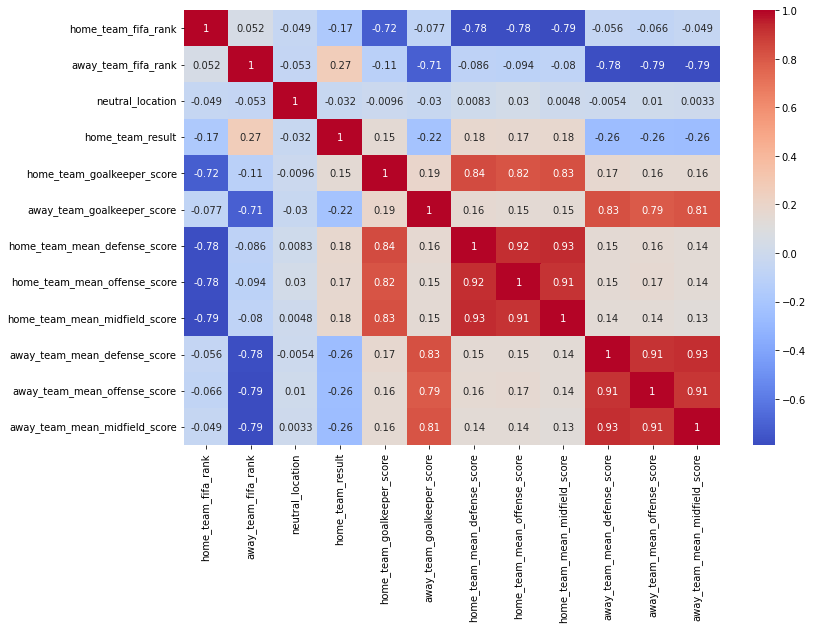

In [ ]:
fig =plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap=plt.cm.coolwarm,cbar=True)

In [ ]:
df_2022 = pd.get_dummies(df_2022)

In [ ]:
df_2022.shape

(9321, 406)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
X = df_2022.drop('home_team_result',axis=1)
y = df_2022['home_team_result']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.fit_transform(X_test)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#pipe = Pipeline(steps=[
#    ('Scaler',StandardScaler()),
#    ('model',LogisticRegression(max_iter=1000))
#])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

              precision    recall  f1-score   support

           0       0.24      0.12      0.16       419
           1       0.52      0.58      0.55       533
           2       0.65      0.75      0.69       913

    accuracy                           0.56      1865
   macro avg       0.47      0.48      0.47      1865
weighted avg       0.52      0.56      0.53      1865



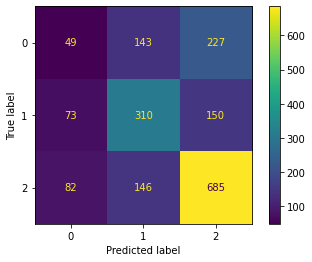

In [ ]:
rf = RandomForestClassifier()
pred = rf.fit(X_train,y_train).predict(X_test)
print(classification_report(y_test,pred))
cm =confusion_matrix(y_test,pred)
dis = ConfusionMatrixDisplay(cm)
dis.plot()